In [225]:
import swat 
import getpass


In [226]:
user = getpass.getpass('Enter your CAS username')



Enter your CAS username········


In [227]:
password = getpass.getpass('Enter your CAS password')

Enter your CAS password········


In [228]:
sess = swat.CAS('localhost', 5570, user, password)

In [229]:
print(sess)

CAS('localhost', 5570, 'sahaqu', protocol='cas', name='py-session-8', session='4a0a02bc-04c4-be42-8809-27a3ec895381')


In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [231]:
from dlpy import Model, Sequential
from dlpy.model import *
from dlpy.layers import *
from dlpy.applications import *
from dlpy.utils import *
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split
from dlpy.model import Optimizer
from dlpy.lr_scheduler import *

In [232]:
sess.loadactionset('image')
sess.loadactionset('deepLearn')
sess.loadactionset('astore')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.
NOTE: Added action set 'astore'.


[actionset]

 'astore'

+ Elapsed: 0.00126s, user: 0.000803s, sys: 0.000427s, mem: 0.257mb

In [233]:
# set data directory path
dir_path = '/data/samiul/SP_Training_Images/'
# load images into CAS Tables
trainImgTbl = ImageTable.load_files(sess, path=dir_path, casout=dict(name='train'))
#testImgTbl = ImageTable.load_files(s, path=dir_path + 'Test', casout=dict(name='test'))

print("Number of images for training:", trainImgTbl.numrows()["numrows"])
#print("Number of images for validation:", testImgTbl.numrows()["numrows"])

Number of images for training: 1349


In [234]:
type(trainImgTbl)

dlpy.images.ImageTable

## Visualizing random SP images

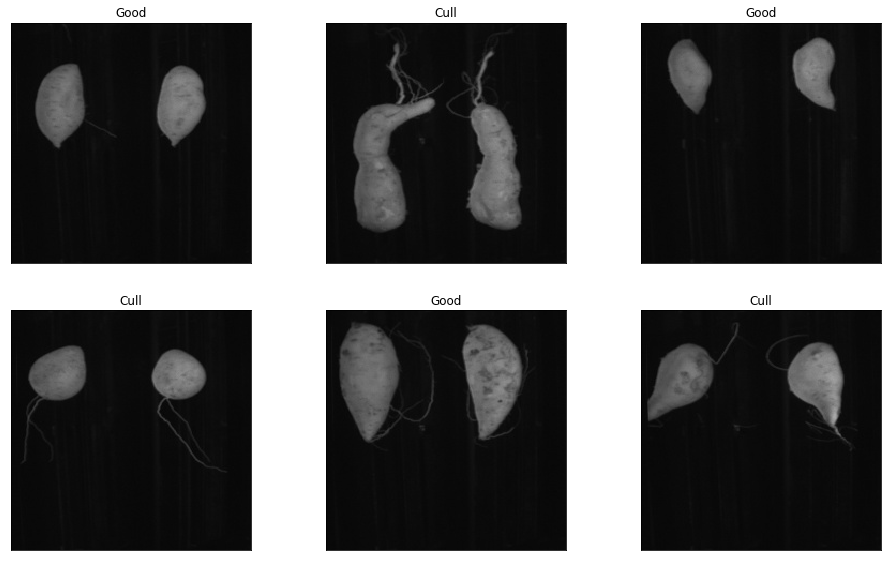

In [237]:
trainImgTbl.resize(width=224,height=224)
trainImgTbl.show(6,ncol=3,randomize=True)

## Creating Training and Testing Sets 

In [238]:
from dlpy.splitting import two_way_split
tr_img, te_img = two_way_split(trainImgTbl,test_rate=20,seed=123)

In [239]:
tr_img.label_freq
te_img.label_freq


,Level,Frequency
Cull,1,145
Good,2,124


In [240]:
print(len(tr_dic))

4


## Building a Sequential Simple CNN

In [272]:
model1=Sequential(sess,model_table='Simple_CNN')
model1.add(InputLayer(3,224,224,offsets=tr_img.channel_means))
model1.add(Conv2d(8,7))
model1.add(Pooling(2))
model1.add(Conv2d(8,7))
model1.add(Pooling(2))
model1.add(Dense(16))
model1.add(OutputLayer(act='softmax',n=2))

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [193]:
model1.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,Input1,input,,,None,"(256, 192, 3)","(0, 0)",0
1,1,Convo.1,convo,"(7, 7)","(1, 1)",Relu,"(256, 192, 8)","(1176, 8)",57802752
2,2,Pool1,pool,"(2, 2)","(2, 2)",Max,"(128, 96, 8)","(0, 0)",0
3,3,Convo.2,convo,"(7, 7)","(1, 1)",Relu,"(128, 96, 8)","(3136, 8)",38535168
4,4,Pool2,pool,"(2, 2)","(2, 2)",Max,"(64, 48, 8)","(0, 0)",0
5,5,F.C.1,fc,"(24576, 16)",,Relu,16,"(393216, 0)",393216
6,6,Output1,output,,,Softmax,2,"(32, 2)",0
7,,,,,,,,Total number of parameters,Total FLOPS
8,Summary,,,,,,,"397,578","96,731,136"


In [194]:
model1.fit(data=tr_img,mini_batch_size=12,max_epochs=100,lr=1e-4,gpu=1)

NOTE: Inputs=_image_ is used
NOTE: Training from scratch.
NOTE: Using sas-viya-smp-with-python3: 2 out of 2 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 397594.
NOTE:  The approximate memory cost is 981.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       3.25 (s).
NOTE:  The total number of threads on each worker is 32.
NOTE:  The total mini-batch size per thread on each worker is 12.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 384.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      2
NOTE:  Levels for the target variable:
NOTE:  Level      0: Cull
NOTE:  Level      1: Good
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001            6.407     0.4766     3.16
NOTE:      1   384 

NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.6549     0.3906     0.12
NOTE:      1   384   0.0001           0.6306     0.3932     0.09
NOTE:      2   384   0.0001           0.6608     0.4349     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  19       0.0001          0.6487     0.4063     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001            0.646     0.3802     0.12
NOTE:      1   384   0.0001           0.6428     0.4193     0.09
NOTE:      2   384   0.0001           0.6487     0.3828     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  20       0.0001          0.6458     0.3941     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.6521     0.4115     0.12
NOTE:      1   384   0.0001           0.6517     0.3932     0.09
NOTE:      

NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.5854      0.349     0.12
NOTE:      1   384   0.0001             0.57     0.2969     0.09
NOTE:      2   384   0.0001            0.613     0.3828     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  40       0.0001          0.5894     0.3429     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.6178     0.3646     0.13
NOTE:      1   384   0.0001           0.6062     0.3672     0.09
NOTE:      2   384   0.0001           0.6065     0.3464     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  41       0.0001          0.6102     0.3594     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.5905     0.3229     0.12
NOTE:      1   384   0.0001           0.5881     0.3255     0.09
NOTE:      

NOTE:      0   384   0.0001           0.5901     0.3281     0.12
NOTE:      1   384   0.0001           0.5986     0.3438     0.09
NOTE:      2   384   0.0001           0.5914     0.3073     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  62       0.0001          0.5934     0.3264     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.5745     0.3047     0.12
NOTE:      1   384   0.0001            0.583     0.3125     0.09
NOTE:      2   384   0.0001           0.5976     0.3047     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  63       0.0001           0.585     0.3073     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.5917     0.3542     0.13
NOTE:      1   384   0.0001           0.5646     0.3021     0.09
NOTE:      2   384   0.0001           0.5642     0.2917     0.09
NOTE:  Epoch Learning R

NOTE:      0   384   0.0001           0.5675     0.3021     0.13
NOTE:      1   384   0.0001           0.5668      0.276     0.09
NOTE:      2   384   0.0001           0.5552     0.3229     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  84       0.0001          0.5632     0.3003     0.30
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.5448     0.2786     0.14
NOTE:      1   384   0.0001           0.5179     0.2708     0.09
NOTE:      2   384   0.0001           0.5276     0.2813     0.09
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  85       0.0001          0.5301     0.2769     0.32
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   384   0.0001           0.5309      0.276     0.13
NOTE:      1   384   0.0001           0.5455     0.2813     0.09
NOTE:      2   384   0.0001            0.533     0.2943     0.09
NOTE:  Epoch Learning R

,Descr,Value
0,Model Name,simple_cnn
1,Model Type,Convolutional Neural Network
2,Number of Layers,7
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,2
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,1
8,Number of Weight Parameters,397560
9,Number of Bias Parameters,34


In [195]:
model1.evaluate(te_img)


NOTE: Due to data distribution, miniBatchSize has been limited to 9.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           269
 1  Number of Observations Used           269
 2  Misclassification Error (%)      39.03346
 3                   Loss Error      0.693315

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(sahaqu)  Valid_Res_j9szkI   269        9   
 
                                             casTable  
 0  CASTable('Valid_Res_j9szkI', caslib='CASUSER(s...  

+ Elapsed: 1.05s, user: 22.9s, sys: 2.85s, mem: 1.9e+03mb

In [241]:
from dlpy import applications
vgg16_model =applications.VGG16(sess, model_table="vgg16table", 
                              n_classes=2,
                              width=224, height=224, 
                                  random_flip="hv",
                                random_mutation=None,
                                pre_trained_weights=True,
                                pre_trained_weights_file='/data/samiul_code/VGG_ILSVRC_16_layers.caffemodel.h5')

NOTE: no dataspec(s) provided - creating image classification model.
NOTE: Model weights attached successfully!
NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16table" according to the model name in the table.


In [270]:
vgg16_model.plot_network();

In [242]:
tr_img.label_freq

,Level,Frequency
Cull,1,582
Good,2,498


## Transfer Learning Using VGG16

In [245]:
vgg16_model.fit(data=tr_img,gpu=1,max_epochs=100,mini_batch_size=8)

NOTE: Inputs=_image_ is used
NOTE: Training based on existing weights.
NOTE: Using sas-viya-smp-with-python3: 2 out of 2 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 134268738.
NOTE:  The approximate memory cost is 5181.00 MB.
NOTE:  Loading weights cost       0.90 (s).
NOTE:  Initializing each layer cost       4.48 (s).
NOTE:  The total number of threads on each worker is 32.
NOTE:  The total mini-batch size per thread on each worker is 8.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 256.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      2
NOTE:  Levels for the target variable:
NOTE:  Level      0: Cull
NOTE:  Level      1: Good
NOTE:  Number of input variables:     1
NOTE:  Number of numeric input variables:      1
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.4987     0.2109    42.89
NOT

NOTE:      4   256     0.01           0.8013     0.5156     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  14         0.01          0.6738     0.3742     2.82
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.7167     0.5195     0.55
NOTE:      1   256     0.01           0.6583     0.3516     0.56
NOTE:      2   256     0.01           0.6753     0.4609     0.56
NOTE:      3   256     0.01           0.6768      0.457     0.56
NOTE:      4   256     0.01           0.6355     0.3164     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  15         0.01          0.6725     0.4211     2.83
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.6113     0.2773     0.54
NOTE:      1   256     0.01           0.5939     0.2813     0.56
NOTE:      2   256     0.01           0.5655     0.2734     0.56
NOTE:      3   256     

NOTE:      2   256     0.01           0.5969      0.375     0.56
NOTE:      3   256     0.01           0.5353     0.2852     0.56
NOTE:      4   256     0.01           0.4886     0.2578     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  30         0.01          0.5917      0.375     2.84
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.5115       0.25     0.55
NOTE:      1   256     0.01           0.4592     0.1523     0.56
NOTE:      2   256     0.01           0.5818     0.2656     0.56
NOTE:      3   256     0.01           0.8996     0.5078     0.56
NOTE:      4   256     0.01           0.6254     0.4414     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  31         0.01          0.6155     0.3234     2.84
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.6299     0.4453     0.55
NOTE:      1   256     

NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  46         0.01          0.3822     0.1664     2.85
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.3007     0.1211     0.54
NOTE:      1   256     0.01           0.2726     0.1016     0.56
NOTE:      2   256     0.01           0.3474     0.1484     0.56
NOTE:      3   256     0.01           0.4448     0.2109     0.56
NOTE:      4   256     0.01           0.3429     0.1719     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  47         0.01          0.3417     0.1508     2.84
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.4742     0.2461     0.55
NOTE:      1   256     0.01           0.2727     0.1172     0.56
NOTE:      2   256     0.01           0.2338    0.08594     0.56
NOTE:      3   256     0.01           0.2859     0.1094     0.56
NOTE:      4   256     

NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.1878    0.08594     0.56
NOTE:      1   256     0.01           0.2571     0.1016     0.56
NOTE:      2   256     0.01           0.4736     0.1875     0.56
NOTE:      3   256     0.01           0.2656     0.1133     0.56
NOTE:      4   256     0.01           0.2056    0.04688     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  63         0.01          0.2779      0.107     2.85
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.1957     0.0625     0.55
NOTE:      1   256     0.01           0.1666    0.05469     0.56
NOTE:      2   256     0.01           0.1565     0.0625     0.56
NOTE:      3   256     0.01           0.1336    0.03516     0.56
NOTE:      4   256     0.01            0.172    0.06641     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  64        

NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  78         0.01           0.238    0.08828     2.83
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01          0.09306    0.01953     0.55
NOTE:      1   256     0.01          0.07997    0.02344     0.56
NOTE:      2   256     0.01          0.09086    0.02344     0.56
NOTE:      3   256     0.01           0.1047    0.04297     0.56
NOTE:      4   256     0.01            0.068   0.003906     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  79         0.01         0.08733    0.02266     2.84
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01           0.1047    0.03125     0.55
NOTE:      1   256     0.01          0.08198    0.01953     0.56
NOTE:      2   256     0.01          0.07042    0.01172     0.56
NOTE:      3   256     0.01           0.0734    0.01953     0.56
NOTE:      4   256     

NOTE:      0   256     0.01          0.05783    0.01953     0.55
NOTE:      1   256     0.01          0.06992    0.02734     0.56
NOTE:      2   256     0.01          0.04992    0.01172     0.56
NOTE:      3   256     0.01          0.04062    0.01563     0.56
NOTE:      4   256     0.01          0.04098   0.007813     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  95         0.01         0.05185    0.01641     2.83
NOTE:  Batch nUsed Learning Rate        Loss  Fit Error   Time(s) (Training)
NOTE:      0   256     0.01          0.01901          0     0.55
NOTE:      1   256     0.01          0.03244   0.007813     0.56
NOTE:      2   256     0.01          0.02081   0.003906     0.56
NOTE:      3   256     0.01          0.02422          0     0.56
NOTE:      4   256     0.01          0.02199   0.007813     0.56
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  96         0.01         0.02369   0.003906     2.82
NOTE:  Batch nUsed Learning Rate   

,Descr,Value
0,Model Name,vgg16table
1,Model Type,Convolutional Neural Network
2,Number of Layers,22
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,13
6,Number of Pooling Layers,5
7,Number of Fully Connected Layers,2
8,Number of Weight Parameters,134256320
9,Number of Bias Parameters,12418


## Training History (VGG16)

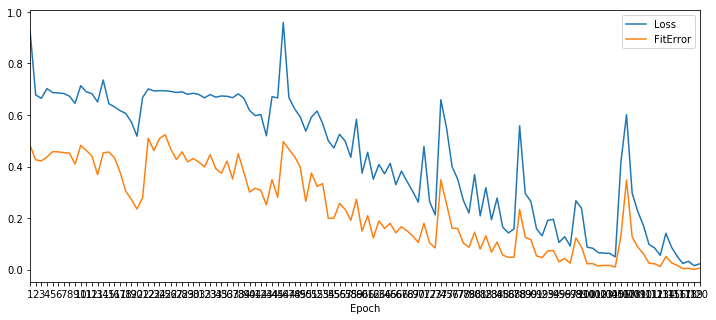

In [246]:
vgg16_model.plot_training_history()

In [250]:
result=vgg16_model.evaluate(te_img,gpu=1)

NOTE: Due to data distribution, miniBatchSize has been limited to 9.
NOTE: Using sas-viya-smp-with-python3: 2 out of 2 available GPU devices.


In [271]:
print(result)

[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read           269
 1  Number of Observations Used           269
 2  Misclassification Error (%)      17.84387
 3                   Loss Error      0.692956

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(sahaqu)  Valid_Res_KmVZeu   269        9   
 
                                             casTable  
 0  CASTable('Valid_Res_KmVZeu', caslib='CASUSER(s...  

+ Elapsed: 23.2s, user: 28.6s, sys: 2.31s, mem: 4.75e+03mb
